In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from numpy.linalg import norm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

a) Init data

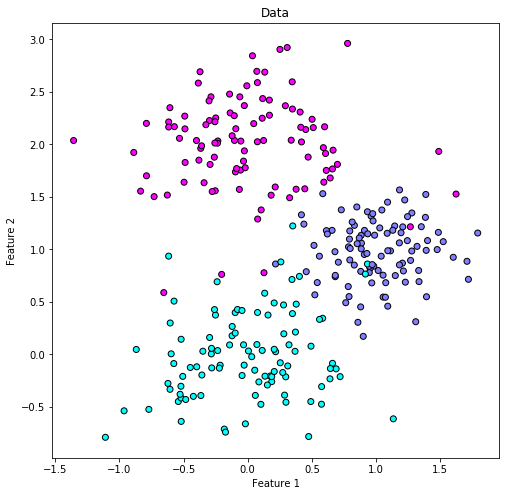

In [2]:
n_samples = 300
n_features = 2
centers = [[0, 0], [1, 1], [0, 2]]
cluster_std = [0.45, 0.3, 0.45]
seed = 96

X, y = make_blobs(n_samples, n_features,
                  centers, cluster_std,
                  random_state=seed)

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.get_cmap('cool'), edgecolors='k')
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

a) K-Means

![K-Means iterative process flowchart](img/kmeans-flowchart.png)

![K-Means iterative process visualized](img/kmeans-visualized.gif)

In [3]:
class DIYKMeans:
    def __init__(self, init_centroids, num_clusters=3, max_iter=300, tol=10e-3):
        if init_centroids is None or init_centroids.shape[0] != num_clusters:
            raise Exception("Exactly `num_clusters` of initial centroids must be provided.")
        
        self.num_clusters = num_clusters
        self.centroids = deepcopy(init_centroids)
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X):
        prev_J = 0
        for i in range(1, self.max_iter + 1):
            b = self.predict(X)
            self.centroids = np.array([np.sum(X[b == k], axis=0) / np.sum(b == k) for k in range(self.num_clusters)])
            
            J = np.sum(norm(X - self.centroids[b])**2)
            
            if (abs(J - prev_J) < self.tol):
                break
            
            prev_J = J
            
        return self.centroids
        
    def predict(self, X):
        return np.argmin([[norm(dot - centroid) for centroid in self.centroids] for dot in X], axis=1)

[[-0.05574492  2.07584403]
 [ 0.98795728  1.0028869 ]
 [-0.04080576 -0.043764  ]]


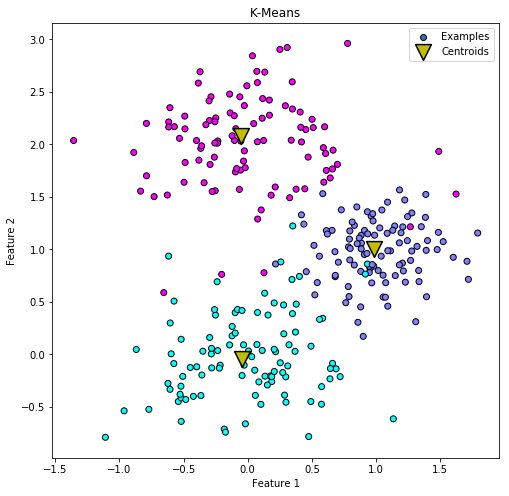

In [4]:
init_centroids = np.array([[10e-3, 10e-3], [10e-3, -10e-3], [-10e-3, -10e-3]])
model = DIYKMeans(init_centroids)
centroids = model.fit(X)
print(centroids)

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.get_cmap('cool'), edgecolors='k', label='Examples')
plt.scatter(centroids[:,0], centroids[:,1], s=250, c='y', marker='v',
            edgecolors='k', linewidths=1.5, label='Centroids')
plt.title('K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

b) Elbow method

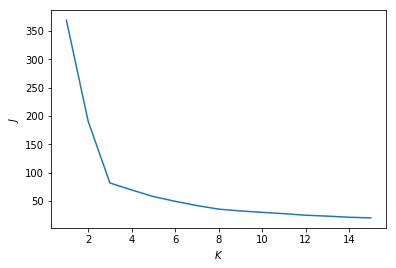

In [5]:
Ks = range(1, 16)
Js = []

for K in Ks:
    model = KMeans(K)
    model.fit(X)
    Js.append(-model.score(X))
    
plt.plot(Ks, Js)
plt.xlabel('$K$')
plt.ylabel('$J$')
plt.show()

c) Rand index

In [6]:
def rand_index_score(y_gold, y_predict):
    a = 0
    b = 0
    c = 0
    d = 0
    
    for i in range(y_gold.shape[0]):
        for j in range(i + 1, y_gold.shape[0]):
            same_a = y_gold[i] == y_gold[j]
            same_b = y_predict[i] == y_predict[j]

            a += same_a and same_b
            b += not same_a and not same_b
            c += same_a and not same_b
            d += not same_a and same_b
            
    rand_index = 1. * (a + b) / (a + b + c + d)
    return rand_index

In [9]:
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters=3)
model.fit(X)

print(rand_index_score(y, model.predict(X)))
print(adjusted_rand_score(y, model.predict(X)))

0.939197324415
0.862957845453
